In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
def read_token_csv(csv_path):
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df

df = read_token_csv('')

In [40]:
def plot_token_graph(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Token Price', color='blue', linewidth=0.5)

    plt.title('Token Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    #plt.legend()
    plt.show()

In [35]:
def read_trend_csv(csv_path):
    df = pd.read_csv(csv_path, skiprows=1)
    df['Week'] = pd.to_datetime(df['Week'])
    df.set_index('Week', inplace=True)
    df_monthly = df.resample('M').sum()
    
    return df_monthly

#df_monthly = read_trend_csv('Google Trends Data Challenge Datasets/trends/ethereum.csv')

In [38]:
def plot_trend_graph(df_monthly):
    key = df_monthly.columns[0]
    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly[key], label=f'{key}', color='orange', marker='o')

    plt.title(f'Monthly Google Trends for {key}')
    plt.xlabel('Month')
    plt.ylabel('Search Interest')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()

In [71]:
def print_start_date(df, token_name):
    start_date = df.index.min()
    print(f"{token_name} -> Start Date: {start_date.strftime('%Y-%m')}")

In [73]:
def print_all_start_dates(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            token_name = file_name.replace('.csv', '')
            file_path = os.path.join(folder_path, file_name)
            
            # Read and print the starting date for the token data
            df = read_token_csv(file_path)
            print_start_date(df, token_name)

#print_all_start_dates('Google Trends Data Challenge Datasets/prices')

# Token analysis

In [ ]:
df = read_token_csv('Google Trends Data Challenge Datasets/prices/BTC-USD.csv')
plot_token_graph(df)

# Trend analysis

In [ ]:
df_monthly = read_trend_csv('Google Trends Data Challenge Datasets/trends/cardano.csv')
plot_trend_graph(df_monthly)

# All tokens plot

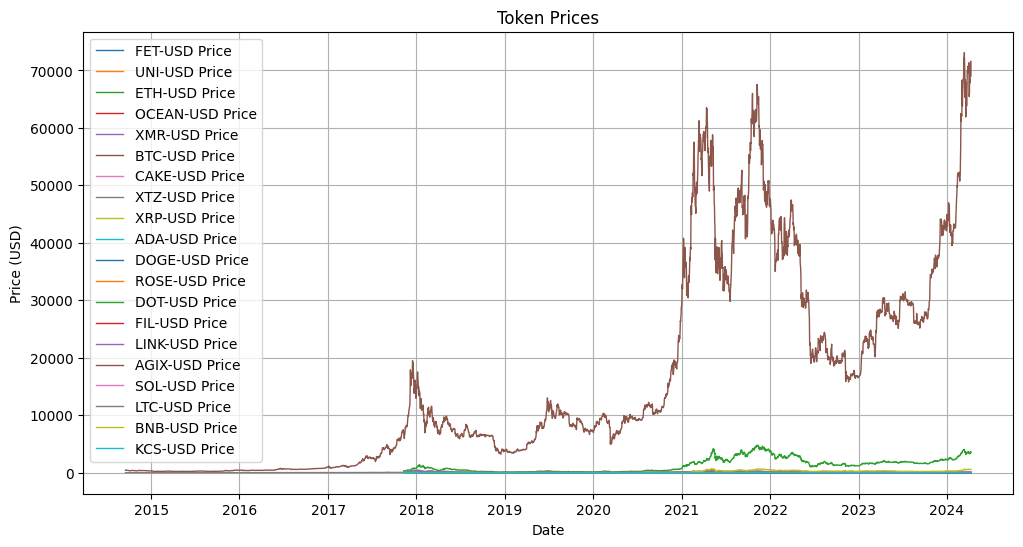

In [54]:
def plot_all_tokens(folder_path):
    tokens = {}
    plt.figure(figsize=(12, 6))
    
    # Loop
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            token_name = file_name.replace('.csv', '')
            file_path = os.path.join(folder_path, file_name)
            
            df = read_token_csv(file_path)
            tokens[token_name] = df
            
            plt.plot(df['Close'], label=f'{token_name} Price', linewidth=1)

    plt.title('Token Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

folder_path = 'Google Trends Data Challenge Datasets/prices'
plot_all_tokens(folder_path)